In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets, linear_model, metrics

# Ensure compatibility
from __future__ import absolute_import, division, print_function

# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Import TensorFlow and Keras packages
import tensorflow as tf
from tensorflow import keras

2024-04-23 02:11:48.862206: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-04-23 02:11:48.906025: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-04-23 02:11:48.906056: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-04-23 02:11:48.907184: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-04-23 02:11:48.914583: I tensorflow/core/platform/cpu_feature_guar

In [2]:
order_data = pd.read_csv("joined_dataset.csv", skiprows = 0)

In [3]:
order_data.dtypes

Category           object
City               object
Customer Name      object
Market             object
Customer ID        object
Order Date         object
Order ID           object
Order Priority     object
Product ID         object
Product Name       object
Row ID              int64
Segment            object
Ship Date          object
Ship Mode          object
State              object
Sub-Category       object
Discount          float64
Profit            float64
Quantity            int64
Sales             float64
Shipping Cost     float64
Discount 1/0        int64
State2             object
Country            object
Region             object
dtype: object

In [4]:
order_data.head()

,Category,City,Customer Name,Market,Customer ID,Order Date,Order ID,Order Priority,Product ID,Product Name,...,Sub-Category,Discount,Profit,Quantity,Sales,Shipping Cost,Discount 1/0,State2,Country,Region
0,Office Supplies,Constantine,Toby Braunhardt,EMEA,TB-112801,1/1/2019,AG-2011-2040,Medium,OFF-TEN-10000025,"Tenex Lockers, Blue",...,Storage,0.0,106.14,2,408.30,35.46,0,Constantine,Algeria,Africa
1,Office Supplies,Dar es Salaam,Jack Garza,EMEA,JG-51151,1/3/2019,TZ-2011-7370,Medium,OFF-STI-10000388,"Stiletto Scissors, Serrated",...,Supplies,0.0,26.76,4,81.24,5.11,0,Dar Es Salaam,Tanzania,Africa
2,Office Supplies,Khartoum,Jasper Cacioppo,EMEA,JC-53401,1/4/2019,SU-2011-5190,Medium,OFF-BOS-10004950,"Boston Pens, Fluorescent",...,Art,0.0,2.61,1,15.48,0.82,0,Khartoum,Sudan,Africa
3,Office Supplies,Khartoum,Jasper Cacioppo,EMEA,JC-53401,1/4/2019,SU-2011-5190,Medium,OFF-AVE-10003279,"Avery Hole Reinforcements, Durable",...,Binders,0.0,2.10,1,5.91,0.51,0,Khartoum,Sudan,Africa
4,Technology,Luanda,Grace Kelly,EMEA,GK-46201,1/6/2019,AO-2011-4910,Medium,TEC-LOG-10003079,"Logitech Flash Drive, Erganomic",...,Accessories,0.0,12.72,1,28.32,2.00,0,Luanda,Angola,Africa


In [5]:
order_data.tail()

,Category,City,Customer Name,Market,Customer ID,Order Date,Order ID,Order Priority,Product ID,Product Name,...,Sub-Category,Discount,Profit,Quantity,Sales,Shipping Cost,Discount 1/0,State2,Country,Region
53362,Office Supplies,Loveland,Jill Matthias,USCA,JM-155804,12/31/2022,CA-2014-156720,Medium,OFF-FA-10003472,Bagged Rubber Bands,...,Fasteners,0.2,-0.60,3,3.02,0.17,1,Colorado,United States,West
53363,Office Supplies,Fairfield,Erica Bern,USCA,EB-139754,12/31/2022,CA-2014-115427,Medium,OFF-BI-10002103,"Cardinal Slant-D Ring Binder, Heavy Gauge Vinyl",...,Binders,0.2,4.52,2,13.90,0.89,1,California,United States,West
53364,Office Supplies,Fairfield,Erica Bern,USCA,EB-139754,12/31/2022,CA-2014-115427,Medium,OFF-BI-10004632,GBC Binding covers,...,Binders,0.2,6.48,2,20.72,2.06,1,California,United States,West
53365,Technology,New York City,Patrick O'Donnell,USCA,PO-188654,12/31/2022,CA-2014-143259,High,TEC-PH-10004774,Gear Head AU3700S Headset,...,Phones,0.0,2.73,7,90.93,9.67,0,New York,United States,East
53366,Office Supplies,Columbus,Chuck Clark,USCA,CC-124304,12/31/2022,CA-2014-126221,Medium,OFF-AP-10002457,Eureka The Boss Plus 12-Amp Hard Box Upright V...,...,Appliances,0.0,56.51,2,209.30,8.32,0,Indiana,United States,Central


In [6]:
order_data['Order Priority'].unique()

array(['Medium', 'High', 'Low', 'Critical'], dtype=object)

In [7]:
#create new column for priority label
def priority_label(level):
    if level == 'Medium':
        return 1
    elif level == 'Critical':
        return 3
    elif level == 'High':
        return 2
    else:
        return 0

order_data['Priority Label'] = order_data['Order Priority'].apply(priority_label)

In [8]:
order_data.head()

,Category,City,Customer Name,Market,Customer ID,Order Date,Order ID,Order Priority,Product ID,Product Name,...,Discount,Profit,Quantity,Sales,Shipping Cost,Discount 1/0,State2,Country,Region,Priority Label
0,Office Supplies,Constantine,Toby Braunhardt,EMEA,TB-112801,1/1/2019,AG-2011-2040,Medium,OFF-TEN-10000025,"Tenex Lockers, Blue",...,0.0,106.14,2,408.30,35.46,0,Constantine,Algeria,Africa,1
1,Office Supplies,Dar es Salaam,Jack Garza,EMEA,JG-51151,1/3/2019,TZ-2011-7370,Medium,OFF-STI-10000388,"Stiletto Scissors, Serrated",...,0.0,26.76,4,81.24,5.11,0,Dar Es Salaam,Tanzania,Africa,1
2,Office Supplies,Khartoum,Jasper Cacioppo,EMEA,JC-53401,1/4/2019,SU-2011-5190,Medium,OFF-BOS-10004950,"Boston Pens, Fluorescent",...,0.0,2.61,1,15.48,0.82,0,Khartoum,Sudan,Africa,1
3,Office Supplies,Khartoum,Jasper Cacioppo,EMEA,JC-53401,1/4/2019,SU-2011-5190,Medium,OFF-AVE-10003279,"Avery Hole Reinforcements, Durable",...,0.0,2.10,1,5.91,0.51,0,Khartoum,Sudan,Africa,1
4,Technology,Luanda,Grace Kelly,EMEA,GK-46201,1/6/2019,AO-2011-4910,Medium,TEC-LOG-10003079,"Logitech Flash Drive, Erganomic",...,0.0,12.72,1,28.32,2.00,0,Luanda,Angola,Africa,1


In [9]:
#normalize independent variables
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
order_data['DiscountNorm'] = mms.fit_transform(order_data[['Discount']])
order_data['ProfitNorm'] = mms.fit_transform(order_data[['Profit']])
order_data['QuantityNorm'] = mms.fit_transform(order_data[['Quantity']])
order_data['SalesNorm'] = mms.fit_transform(order_data[['Sales']])
order_data['ShippingCostNorm'] = mms.fit_transform(order_data[['Shipping Cost']])

In [10]:
order_data.head()

,Category,City,Customer Name,Market,Customer ID,Order Date,Order ID,Order Priority,Product ID,Product Name,...,Discount 1/0,State2,Country,Region,Priority Label,DiscountNorm,ProfitNorm,QuantityNorm,SalesNorm,ShippingCostNorm
0,Office Supplies,Constantine,Toby Braunhardt,EMEA,TB-112801,1/1/2019,AG-2011-2040,Medium,OFF-TEN-10000025,"Tenex Lockers, Blue",...,0,Constantine,Algeria,Africa,1,0.0,0.447076,0.076923,0.018017,0.037983
1,Office Supplies,Dar es Salaam,Jack Garza,EMEA,JG-51151,1/3/2019,TZ-2011-7370,Medium,OFF-STI-10000388,"Stiletto Scissors, Serrated",...,0,Dar Es Salaam,Tanzania,Africa,1,0.0,0.441784,0.230769,0.003569,0.005474
2,Office Supplies,Khartoum,Jasper Cacioppo,EMEA,JC-53401,1/4/2019,SU-2011-5190,Medium,OFF-BOS-10004950,"Boston Pens, Fluorescent",...,0,Khartoum,Sudan,Africa,1,0.0,0.440174,0.000000,0.000664,0.000878
3,Office Supplies,Khartoum,Jasper Cacioppo,EMEA,JC-53401,1/4/2019,SU-2011-5190,Medium,OFF-AVE-10003279,"Avery Hole Reinforcements, Durable",...,0,Khartoum,Sudan,Africa,1,0.0,0.440140,0.000000,0.000242,0.000546
4,Technology,Luanda,Grace Kelly,EMEA,GK-46201,1/6/2019,AO-2011-4910,Medium,TEC-LOG-10003079,"Logitech Flash Drive, Erganomic",...,0,Luanda,Angola,Africa,1,0.0,0.440848,0.000000,0.001232,0.002142


In [11]:
order_data.columns.get_loc('DiscountNorm')

26

In [12]:
datanparray = order_data.values

In [13]:
# Define independent variables, QunatityNorm, SalesNorm, ShippingCostsNorm
TrainData   = datanparray[:, [28, 29, 30]]
# Define dependent variable, Priority Label
TrainLabels = datanparray[:, [25]]

In [14]:
TrainDataFloat = TrainData.astype(float)
TrainDataFloat

array([[0.07692308, 0.01801658, 0.03798323],
       [0.23076923, 0.00356921, 0.00547361],
       [0.        , 0.00066437, 0.00087835],
       ...,
       [0.07692308, 0.00089584, 0.00220658],
       [0.46153846, 0.00399725, 0.01035809],
       [0.07692308, 0.00922606, 0.00891203]])

In [15]:
TrainLabelsInt = TrainLabels.astype(int)
TrainLabelsInt

array([[1],
       [1],
       [1],
       ...,
       [1],
       [2],
       [1]])

In [16]:
print("TrainDataFloat shape:", TrainDataFloat.shape)
print("TrainLabelsInt shape:", TrainLabelsInt.shape)
print("TrainDataFloat dtype:", TrainDataFloat.dtype)
print("TrainLabelsInt dtype:", TrainLabelsInt.dtype)

TrainDataFloat shape: (53367, 3)
TrainLabelsInt shape: (53367, 1)
TrainDataFloat dtype: float64
TrainLabelsInt dtype: int64


In [17]:
model = keras.Sequential([
    keras.layers.Dense(16, activation=tf.nn.relu),
    keras.layers.Dense(8, activation=tf.nn.relu),
    keras.layers.Dense(4, activation=tf.nn.softmax)
])

In [18]:
#model for adam optimizer, and loss = sparse_categorical_crossentropy
model.compile(
              optimizer='adam',
#             optimizer='sgd',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [19]:
model.fit(TrainDataFloat, TrainLabelsInt, epochs=36)

Epoch 1/36
1668/1668 [==============================] - 3s 1ms/step - loss: 1.0225 - accuracy: 0.5786
Epoch 2/36
1668/1668 [==============================] - 2s 1ms/step - loss: 0.9677 - accuracy: 0.5930
Epoch 3/36
1668/1668 [==============================] - 2s 1ms/step - loss: 0.9288 - accuracy: 0.6094
Epoch 4/36
1668/1668 [==============================] - 2s 1ms/step - loss: 0.8995 - accuracy: 0.6265
Epoch 5/36
1668/1668 [==============================] - 4s 2ms/step - loss: 0.8769 - accuracy: 0.6404
Epoch 6/36
1668/1668 [==============================] - 2s 1ms/step - loss: 0.8564 - accuracy: 0.6523
Epoch 7/36
1668/1668 [==============================] - 2s 1ms/step - loss: 0.8409 - accuracy: 0.6611
Epoch 8/36
1668/1668 [==============================] - 2s 1ms/step - loss: 0.8271 - accuracy: 0.6696
Epoch 9/36
1668/1668 [==============================] - 2s 1ms/step - loss: 0.8172 - accuracy: 0.6758
Epoch 10/36
1668/1668 [==============================] - 2s 1ms/step - loss: 0.808

In [20]:
train_loss, train_acc = model.evaluate(TrainDataFloat, TrainLabelsInt)

print('Train accuracy:', train_acc)

1668/1668 [==============================] - 2s 1ms/step - loss: 0.7422 - accuracy: 0.7225
Train accuracy: 0.722468912601471


In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                64        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
Total params: 236 (944.00 Byte)
Trainable params: 236 (944.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [22]:
predictions = model.predict(TrainDataFloat)

1668/1668 [==============================] - 2s 1ms/step


In [23]:
priority_labels= ['Low', 'Medium', 'High', 'Critical']

In [24]:
print(len(predictions[0]))
print(len(priority_labels))

4
4


In [25]:
def plot_image(i, predictions_array, true_label):
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  predicted_label = np.argmax(predictions_array[i])
  if predicted_label == true_label[i][0]:
    TextColor = 'blue'
  else:
    TextColor = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(
                                  priority_labels[predicted_label],
                                  100*np.max(predictions_array[i]),
                                  priority_labels[true_label[i][0]]
                                  ),
                                color=TextColor)

def plot_value_array(i, predictions_array, true_label):
  plt.grid(True)
  plt.ylim([0, 1])

  predicted_label = np.argmax(predictions_array[i])
  thisplot = plt.bar(range(len(predictions_array[0])), predictions_array[i], color="#777777")

  # if the true label equals the predicted label, then the blue color will overwrite the red color
  thisplot[predicted_label].set_color('red')
  thisplot[true_label[i][0]].set_color('blue')

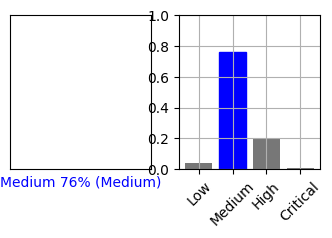

In [26]:
i = 0
# width, height
plt.figure(figsize=(4,2))

# nrows, ncols, index
plt.subplot(1,2,1)
# Create summary plot on left side
plot_image(i, predictions, TrainLabelsInt)
# nrows, ncols, index
plt.subplot(1,2,2)
# Create bar plot on right side
plot_value_array(i, predictions, TrainLabelsInt)
# Label X axis with classification names
plt.xticks(range(len(predictions[0])), priority_labels, rotation=45)
# Display the graphic
plt.show()
# Blue bar is correct.  If red bar appears, it is the incorrect prediction of the model.

In [27]:
predictions[0]

array([0.04109452, 0.7595098 , 0.19512206, 0.00427361], dtype=float32)

In [28]:
print("Number of predictions:", len(predictions))
print("Number of labels:", len(TrainLabelsInt))

Number of predictions: 53367
Number of labels: 53367


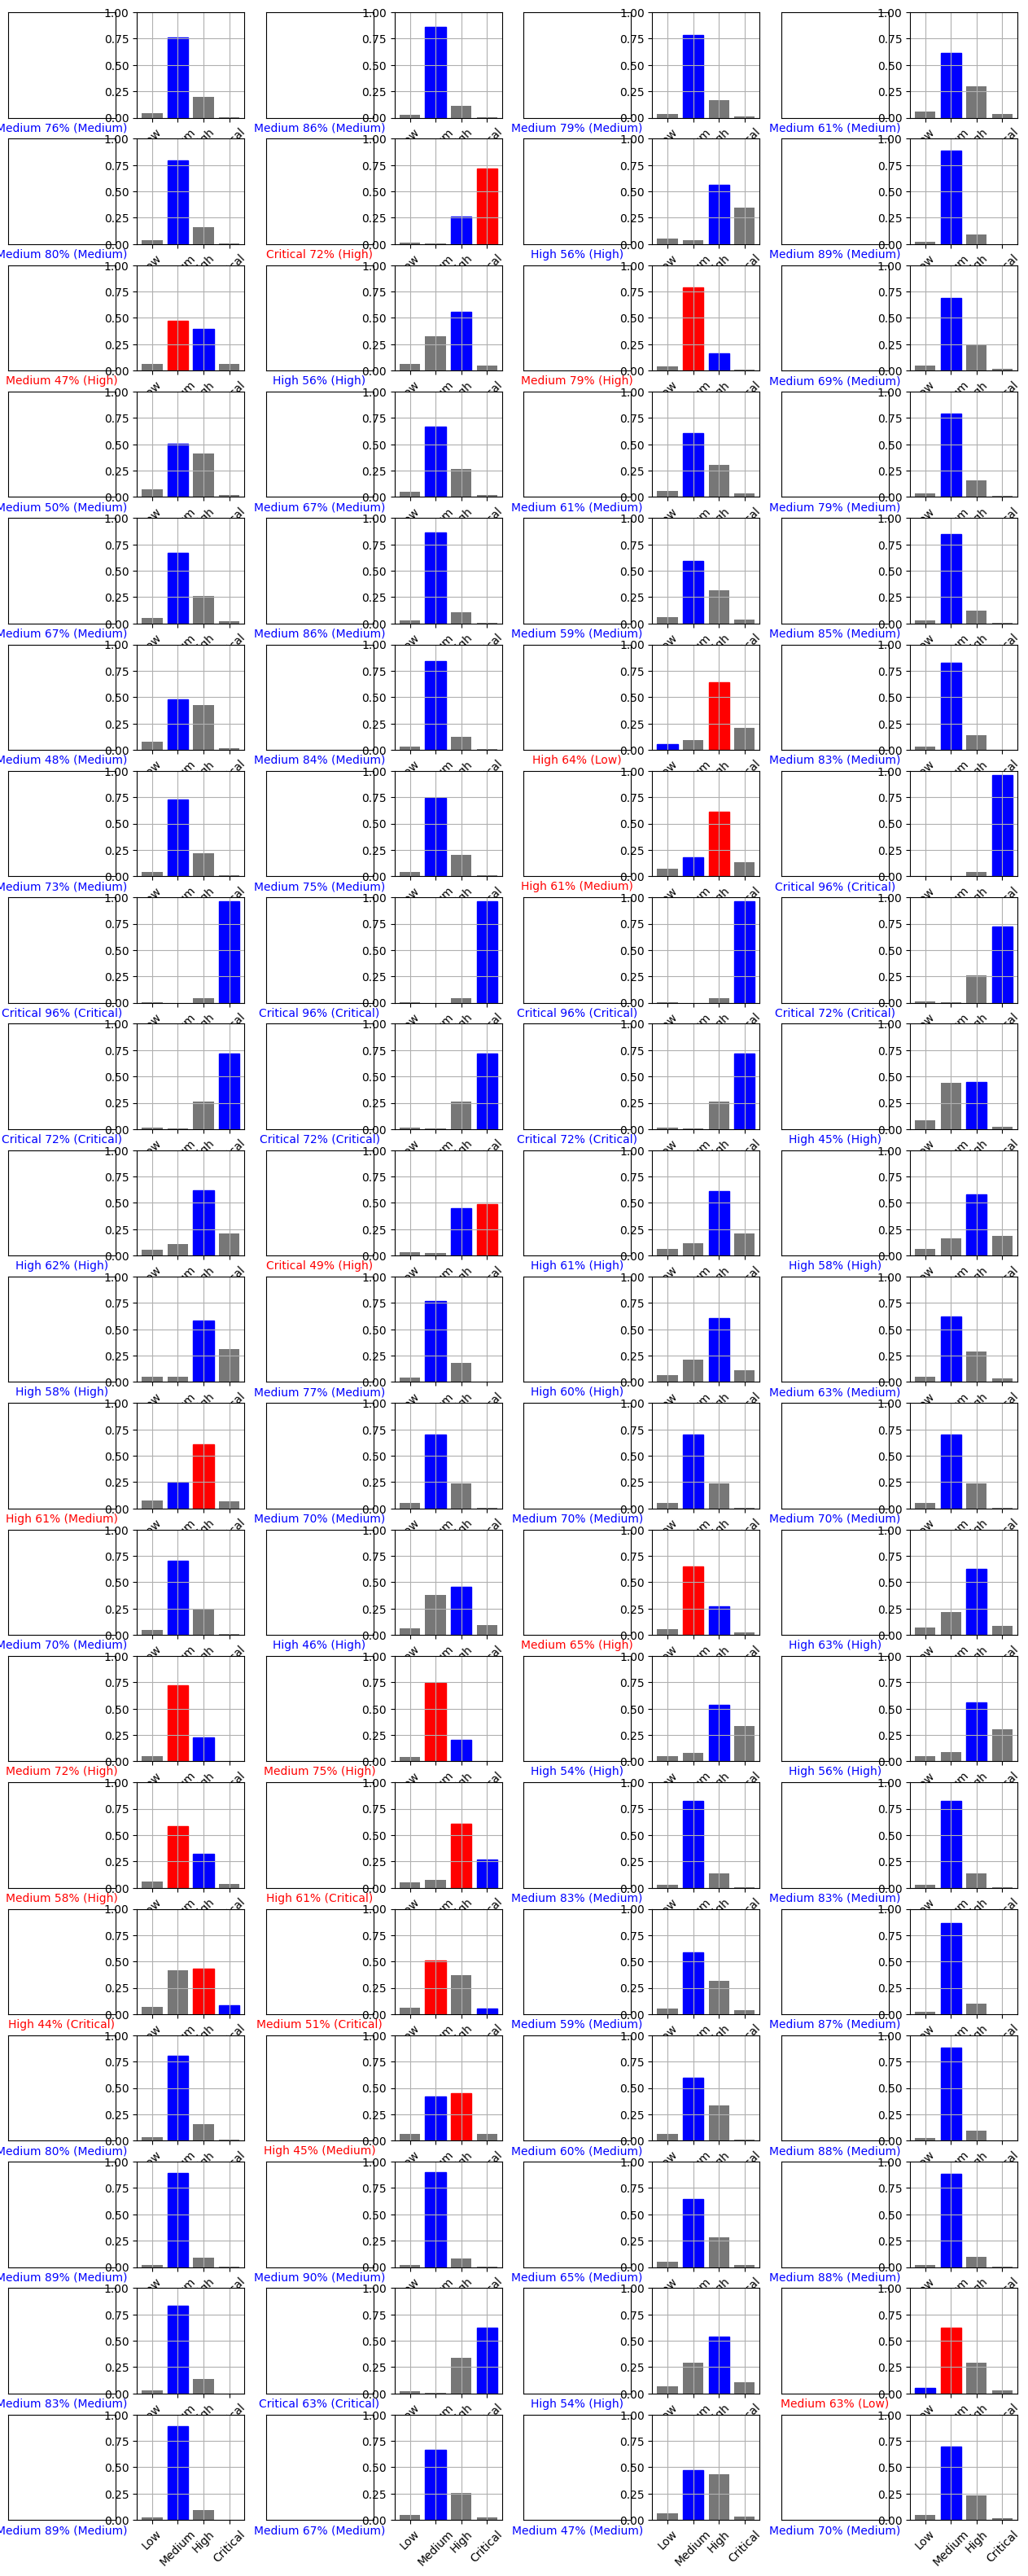

In [29]:
num_rows = 20
num_cols = 4
num_images = num_rows*num_cols
# width, height
plt.figure(figsize=(2*2*num_cols, 2*num_rows))

# Create each plot
for i in range(num_images):
  # nrows, ncols, index
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  # Create summary plot on left side
  plot_image(i, predictions, TrainLabelsInt)
  # nrows, ncols, index
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  # Create bar plot on right side
  plot_value_array(i, predictions, TrainLabelsInt)
  # Label X axis with classification names
  plt.xticks(range(len(predictions[0])), priority_labels, rotation=45)

# Display the graphic
plt.show()
# Blue bar is correct.  If red bar appears, it is the incorrect prediction of the model.

In [30]:
layer0 = model.get_layer(index=0)

In [31]:
layer0.get_weights()

[array([[ 6.22297823e-03,  4.39035475e-01, -2.02330686e-02,
          5.96119612e-02, -1.27239537e-03, -3.37452710e-01,
         -4.22431588e-01,  2.20612790e-02,  1.59408122e-01,
         -4.41519022e-02, -1.04756683e-01, -2.02218994e-01,
          4.04394895e-01, -1.86688155e-01, -3.10604393e-01,
         -4.37218696e-03],
        [ 5.63753557e+00,  2.65641403e+00,  1.56577754e+00,
         -4.78774786e+00,  5.70123577e+00, -2.82413870e-01,
         -3.09253484e-01,  3.33846521e+00,  3.63581681e+00,
         -5.43529272e-01, -1.16948575e-01, -6.43714714e+00,
         -1.05993223e+00,  2.82354522e+00,  4.27105951e+00,
         -1.00182190e+01],
        [-2.64063716e+00,  2.33296871e-01, -3.73182446e-01,
          1.38340425e+00, -7.25447369e+00, -3.41872841e-01,
         -2.22405702e-01,  7.91055188e-02, -1.57319868e+00,
         -2.28218675e-01, -4.80465025e-01,  6.10554218e-01,
          5.95485687e-01, -3.57992530e+00,  3.32440823e-01,
          1.01636040e+00]], dtype=float32),
 a

In [32]:
layer1 = model.get_layer(index=1)

In [33]:
layer1.get_weights()

[array([[-5.2571597e+00,  1.6718188e-01, -5.4056066e-01, -5.5854473e+00,
         -3.5686812e+00,  3.6466363e-01, -6.2874627e-01,  2.7892780e-01],
        [-1.5326670e-01,  5.1348619e-02,  2.3357123e-01, -1.6471650e-01,
         -1.6254850e-01, -9.1933995e-02,  8.1469190e-01,  3.0073289e-02],
        [ 2.9094589e-01,  7.1190786e-01,  6.9413722e-01, -2.4661493e-02,
         -5.6355709e-01, -1.6152640e-01,  7.1952921e-01,  5.3602953e-02],
        [ 1.2796843e-01, -2.4209652e+00, -2.6539106e+00,  2.4111438e+00,
          2.0017567e+00, -2.3584764e-01, -1.4795206e+00, -6.9323317e-03],
        [-5.6191025e+00,  2.6079240e-01, -3.1699289e-02, -5.4904437e+00,
         -3.4968877e+00, -2.9837990e-01, -3.9900586e-01, -1.2674201e-01],
        [ 4.4282377e-01, -1.1046183e-01, -4.6168780e-01,  4.9755573e-03,
         -3.3822441e-01, -1.5459895e-01,  4.0137446e-01,  3.0833972e-01],
        [-2.1178699e-01,  3.4700501e-01, -1.2067747e-01,  1.2491107e-02,
         -3.1556678e-01,  3.1542623e-01, -2.1

In [34]:
layer2 = model.get_layer(index=2)

In [35]:
layer2.get_weights()

[array([[ 1.0573993 , -7.674918  ,  2.1238024 ,  4.6888156 ],
        [ 0.1129563 ,  1.4703861 ,  0.41945347, -2.8423681 ],
        [-0.20144732,  1.1207936 ,  0.26109084, -1.7068242 ],
        [-2.2215793 , -7.44974   , -0.17552952,  8.619286  ],
        [-1.9478513 , -1.5612717 ,  0.9297414 ,  2.9761918 ],
        [ 0.2724761 , -0.60613036,  0.49890682, -0.35352138],
        [-0.08294991,  1.3473006 ,  0.4227912 , -1.9574744 ],
        [-0.5190721 ,  0.6281942 , -0.3160201 , -0.01801858]],
       dtype=float32),
 array([-0.7399359 ,  0.5568966 , -0.0815769 ,  0.05311239], dtype=float32)]

In [36]:
# Create data frame that contains predictions
predictionsDF = pd.DataFrame(
    data=predictions,
    columns=priority_labels
    )


In [37]:
# Create external file that contains the predictions
predictionsDF.to_csv("Predictions1.csv", encoding='utf-8', header=True, index=False)


In [38]:
# Create one-dimensional array
TrainLabelsInt1D = np.ndarray.copy(TrainLabelsInt[:,0])

# Determine predicted outcomes and whether predicted outcomes equal actual outcomes
PredictedLabels1D   = np.ndarray.copy(TrainLabelsInt1D)
PredictedOutcomes1D = np.ndarray.copy(TrainLabelsInt1D)
for i in range(len(TrainLabelsInt1D)):
    PredictedLabels1D[i] = np.argmax(predictions[i])
    if PredictedLabels1D[i] == TrainLabelsInt1D[i]:
        PredictedOutcomes1D[i] = 1
    else:
        PredictedOutcomes1D[i] = 0

In [39]:
TrainLabelsInt1D

array([1, 1, 1, ..., 1, 2, 1])

In [40]:
PredictedLabels1D

array([1, 1, 1, ..., 1, 1, 1])

In [41]:
PredictedOutcomes1D

array([1, 1, 1, ..., 1, 0, 1])

In [42]:
# Create classification matrix
# The classification matrix columns represent the prediction labels and the rows represent the actual labels
tf.math.confusion_matrix(
    TrainLabelsInt1D,
    PredictedLabels1D,
    num_classes=None,
    weights=None,
    dtype=tf.dtypes.int32,
    name=None
    )

<tf.Tensor: shape=(4, 4), dtype=int32, numpy=
array([[    0,  1180,  1322,     3],
       [    0, 27003,  3535,   104],
       [    0,  5951,  9506,   689],
       [    0,   279,  1748,  2047]], dtype=int32)>

In [43]:
# Create classification matrix
# The classification matrix columns represent the prediction labels and the rows represent the actual labels
from sklearn.metrics import confusion_matrix

ClassificationMatrix = confusion_matrix(
    TrainLabelsInt1D,
    PredictedLabels1D
    )
print('Classification Matrix')
print(ClassificationMatrix)

Classification Matrix
[[    0  1180  1322     3]
 [    0 27003  3535   104]
 [    0  5951  9506   689]
 [    0   279  1748  2047]]


In [44]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('Accuracy: {:.2f}'.format(accuracy_score(TrainLabelsInt1D, PredictedLabels1D)))

Accuracy: 0.72


In [45]:
# Sensitivity is also called true positive rate (TPR) or recall
print('Sensitivity: {:.2f}'.format(recall_score(TrainLabelsInt1D, PredictedLabels1D, average='micro')))

Sensitivity: 0.72


In [46]:
# Create two-dimensional array
PredictedLabels2D      = np.ndarray.copy(TrainLabelsInt)
PredictedLabels2D[:,0] = np.ndarray.copy(PredictedLabels1D)

PredictedOutcomes2D      = np.ndarray.copy(TrainLabelsInt)
PredictedOutcomes2D[:,0] = np.ndarray.copy(PredictedOutcomes1D)

In [47]:
PredictedLabels1D

array([1, 1, 1, ..., 1, 1, 1])

In [48]:
PredictedLabels2D

array([[1],
       [1],
       [1],
       ...,
       [1],
       [1],
       [1]])

In [49]:
PredictedOutcomes1D

array([1, 1, 1, ..., 1, 0, 1])

In [50]:
PredictedOutcomes2D

array([[1],
       [1],
       [1],
       ...,
       [1],
       [0],
       [1]])

In [51]:
TrainDataLabels                        = np.append(TrainDataFloat, TrainLabelsInt, axis=1)
TrainDataLabelsPredictions             = np.append(TrainDataLabels, PredictedLabels2D, axis=1)
TrainDataLabelsPredictionsOutcomes     = np.append(TrainDataLabelsPredictions, PredictedOutcomes2D, axis=1)
TrainDataLabelsPredictionsOutcomesProb = np.append(TrainDataLabelsPredictionsOutcomes, predictions, axis=1)

In [52]:
# Define header
HeaderNames = ['QuantityNorm', 'SalesNorm', 'ShippingCostNorm', 'OrderPriorityLabelActual', 'OrderPriorityLabelPrediction', 'OrderPriorityLabelAccurate',
    'LowProbability', 'MediumProbability', 'HighProbability', 'CriticalProbability']

# Create data frame
TDLPOP_DF = pd.DataFrame(
    data=TrainDataLabelsPredictionsOutcomesProb,
    columns=HeaderNames
    )

In [53]:
TDLPOP_DF.to_csv("Predictions2.csv", encoding='utf-8', header=True, index=False)

In [54]:
# Create directory to save model
!mkdir -p Models

In [55]:
# Save model
tf.keras.models.save_model(
    model,
    "Models",
    overwrite=True,
    include_optimizer=True,
    save_format=None,
    signatures=None,
    options=None
    )

INFO:tensorflow:Assets written to: Models/assets


INFO:tensorflow:Assets written to: Models/assets


In [56]:
# Load saved model
new_model = tf.keras.models.load_model("Models")

In [57]:
# Print summary of original model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                64        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
Total params: 236 (944.00 Byte)
Trainable params: 236 (944.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [58]:
# Print summary of loaded model
new_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                64        
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dense_2 (Dense)             (None, 4)                 36        
                                                                 
Total params: 236 (944.00 Byte)
Trainable params: 236 (944.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [59]:
#QunatityNorm, SalesNorm, ShippingCostsNorm
#Each ranges from 0 to 1
SingleObservation = np.array([[0.9, 0.9, 0.9]])
SingleObservationFloat = SingleObservation.astype(float)

SinglePrediction         = model.predict(SingleObservationFloat)
SinglePredictionNewModel = new_model.predict(SingleObservationFloat)

# Print prediction
print(SinglePrediction[0])
print(SinglePredictionNewModel[0])

1/1 [==============================] - 0s 42ms/step
[1.0078875e-02 9.2866850e-01 6.0928036e-02 3.2458195e-04]
[1.0078875e-02 9.2866850e-01 6.0928036e-02 3.2458195e-04]


In [60]:
SinglePrediction[0]

array([1.0078875e-02, 9.2866850e-01, 6.0928036e-02, 3.2458195e-04],
      dtype=float32)

In [61]:
SinglePredictionNewModel[0]

array([1.0078875e-02, 9.2866850e-01, 6.0928036e-02, 3.2458195e-04],
      dtype=float32)

In [62]:
np.max(SinglePrediction[0])

0.9286685

In [63]:
np.argmax(SinglePrediction[0])

1

In [64]:
priority_labels[np.argmax(SinglePrediction[0])]

'Medium'